Demonstration of CVAE as in Doersch's tutorial.

In [1]:
import sys
sys.path.append('../core/')
sys.path.append('../networks/')
from simple_fc import build_encoder, build_decoder
from cvae import Conditional_Variational_Autoencoder

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
tf.reset_default_graph()

In [4]:
# Conditional VAE
sess = tf.InteractiveSession()
model = Conditional_Variational_Autoencoder(sess, build_encoder, build_decoder, batch_size = 100,z_dim = 20,img_dim = 784,dataset = 'mnist',
                              learning_rate = 0.001, num_epochs = 10)
model.train()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch 1 loss: 186.428011724
Epoch 2 loss: 134.391656286
Epoch 3 loss: 123.360059093
Epoch 4 loss: 118.172192508
Epoch 5 loss: 115.033852706
Epoch 6 loss: 112.503046084
Epoch 7 loss: 110.537106309
Epoch 8 loss: 109.072543807
Epoch 9 loss: 107.873835962
Epoch 10 loss: 106.973419314


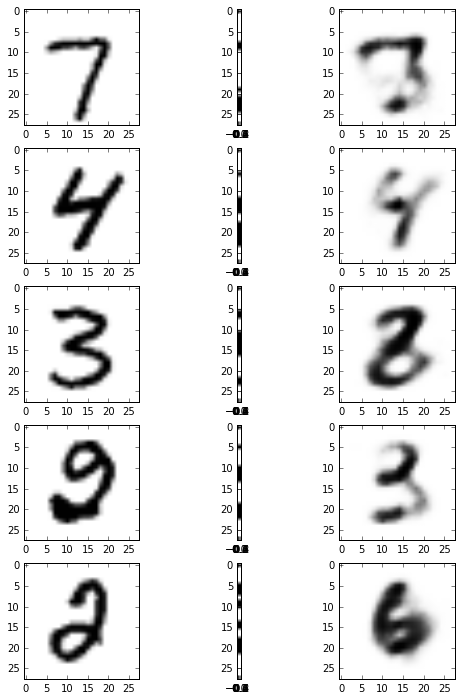

In [6]:
from misc_ops import *
images, _ = mnist.train.next_batch(100)
cols = get_middle_column(images)
generated_images = model.generate(num=100, cols=cols)

num_show = 5
plt.figure(figsize=(8,12))
for i in xrange(num_show):
    plt.subplot(num_show, 3, 3*i+1)
    plt.imshow(images[i,].reshape(28, 28), cmap='gray_r')
    plt.subplot(num_show, 3, 3*i+2)
    plt.imshow(cols[i,].reshape(28,1), cmap='gray_r')
    plt.subplot(num_show, 3, 3*i+3)
    plt.imshow(generated_images[i,].reshape(28,28), cmap='gray_r')
plt.show()

In [ ]:
sess.close()
tf.reset_default_graph()